In [1]:
import os
from pprint import pprint
import dask.dataframe as dd
import matplotlib.pyplot as plt
import numpy as np
import aux as aux
from dask.distributed import SSHCluster,Client
import anomalies as an
import pandas as pd

In [2]:
client = Client("172.18.0.2:8786")

In [3]:
path=os.path.abspath('./data/data.csv')

df = dd.read_csv(path)

In [4]:
hardware_list = ['SW-115']

metrics = ['S125','S181']

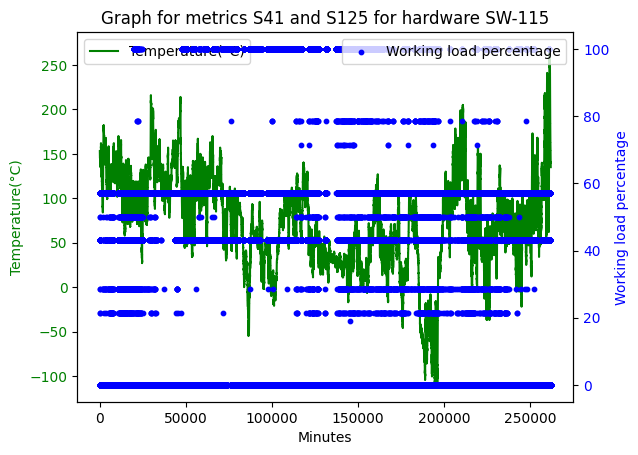

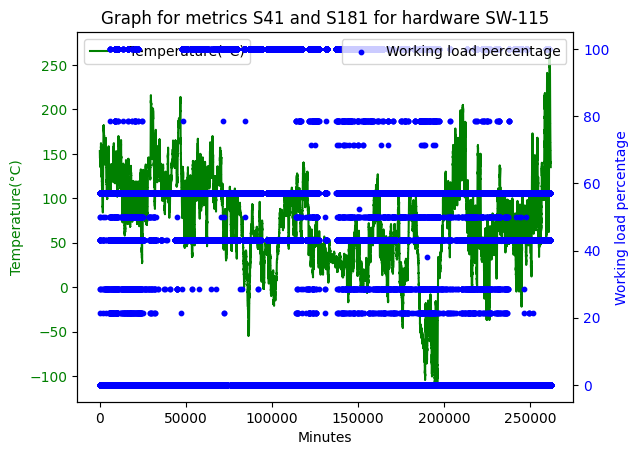

In [5]:
for hw in hardware_list:
    temp_val, temp_min = aux.get_norm_data(df,hw,'S41')
    temp_fill = aux.fill_missing_min(temp_val, temp_min)
    for metric in metrics:
        perc_val, perc_min = aux.get_norm_data(df,hw,metric)
        perc_fill = aux.fill_missing_min(perc_val, perc_min)
        
        fig,ax1 = plt.subplots()
    
        ax1.plot(range(len(temp_fill)), temp_fill, 'g-', label='Temperature(°C)')
        ax1.set_xlabel('Minutes')
        ax1.set_ylabel('Temperature(°C)', color='g')
        ax1.tick_params(axis='y', labelcolor='g')

        ax2 = ax1.twinx()

        ax2.scatter(range(len(perc_fill)), perc_fill, s= 10, color='b', label='Working load percentage')
        ax2.set_ylabel('Working load percentage', color='b')
        ax2.tick_params(axis='y', labelcolor='b')
        
        ax1.legend(loc='upper left')
        ax2.legend(loc='upper right')

        plt.title(f"Graph for metrics S41 and {metric} for hardware {hw}")

        output_directory = './Task2/Graphs'  
        output_file = f'{hw}_{metric}_plot.png'

        os.makedirs(output_directory, exist_ok=True)

        output_path = os.path.join(output_directory, output_file)
        
        plt.savefig(output_path)
        plt.show()
